<div align="center">
    <img src='../assets/ufpepimes.png' width="100">
    <h4 align="center">
        UNIVERSIDADE FEDERAL DE PERNAMBUCO
        <br>
        PIMES - PROGRAMA DE PÓS-GRADUAÇÃO EM ECONOMIA
        <br>
        TÓPICOS ESPECIAIS EM MÉTODOS QUANTITATIVOS
        <br>
        <br>
        <br>
        RELAÇÃO ENTRE CRÉDITO E COMPLEXIDADE ECONÔMICA NOS ESTADOS BRASILEIROS:
        <br>
        VERIFICANDO SE HÁ DIFERENÇAS ENTRE ESTADOS COM BAIXA, MÉDIA E ALTA COMPLEXIDADE NO ANO DE 2022.
        <br>
        <br>
    </h4>
        <br>
        Trabalho Final para Conclusão de disciplina
        <br>
        ministrada pelo <strong>Prof. Dr. Gustavo Ramos Sampaio</strong>.
        <br>
        <br>
        <br>
        Estudante: <strong>Lindinaldo Freitas de Alencar</strong>.
</div>

In [2]:
# Importando bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp
import json
sns.set_theme(style="white")

In [4]:
# Importando base de dados
df = pd.read_csv('../assets/df_2022.csv')
# Importando arquivo json com relação de códigos do IBGE para ufs
with open("../assets/ufs.json", "r", encoding="utf-8") as arquivo:
    ibge_ufs = json.load(arquivo)
# Adicionando coluna 'uf'
df['uf'] = df.lugar.apply(lambda x: ibge_ufs['cod'][str(x)])

In [5]:
# Criando DataFrame agrupado por estados.
df_r = df[['uf', 'ICE', 'ICDC']].groupby(['uf'], as_index=False).mean()
# Criando DataFrame agrupado por setor
df_s = df[['setor', 'ICS', 'ICUC']].groupby(['setor'], as_index=False).mean()

#### Dividindo os estados em grupos por nível de Complexidade Econômica.
##### Os estados serão classificados em baixa, média e alta complexidade com base nos tercis do ICE-R.

In [6]:
# Calculando tercis baseados no Índice de Complexidade Econômica Regional
primeiro_tercil = df_r.ICE.quantile(1/3)
segundo_tercil = df_r.ICE.quantile(2/3)

# Função para definir nível de complexidade com base nos tercis.
def nivel(ice):
    if ice < primeiro_tercil:
        n = 'Baixa Complexidade'
    elif (ice >= primeiro_tercil) & (ice < segundo_tercil):
        n = 'Média Complexidade'
    else:
        n = 'Alta Complexidade'
    return n

# Adicionado coluna com nível de complexidade econômica.
df_r['Complexidade'] = df_r.ICE.apply(lambda x: nivel(x))

#### Visualização dos grupos e informações sobre distribuição.

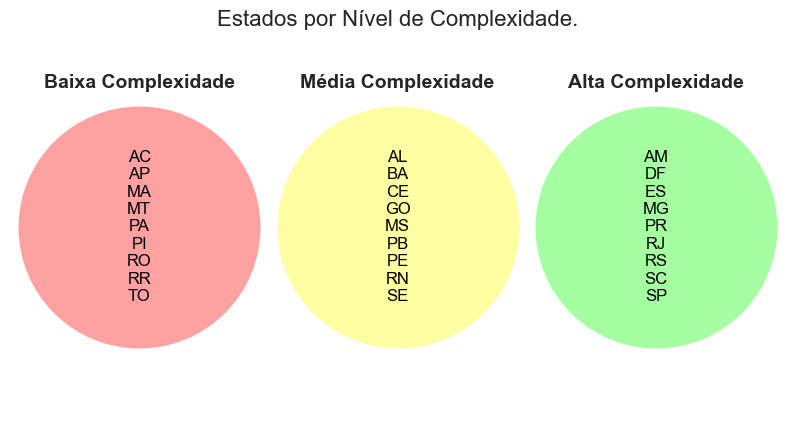

In [7]:
# Plotando Gráfico com a divisão dos Estados por nível de complexidade econômica.
pos = [(1, 1), (2, 1), (3, 1)]
color = ['#ffa1a1','#fffea1','#a5ffa1']
titulo = ['Baixa Complexidade', 'Média Complexidade', 'Alta Complexidade']
fig, ax = plt.subplots(figsize=(10, 5))
for i, (serie, pos) in enumerate(zip([df_r.uf[df_r.Complexidade == titulo[0]], df_r.uf[df_r.Complexidade == titulo[1]], df_r.uf[df_r.Complexidade == titulo[2]]], pos)):
    ax.scatter(pos[0], pos[1], s=30000, color=color[i])
    ax.text(pos[0], pos[1], "\n".join(serie), ha='center', va='center', fontsize=12, color='black')
    ax.text(pos[0], pos[1] + 0.35, titulo[i], ha='center', va='bottom', fontsize=14, fontweight='bold')
ax.set_xlim(0.5, 3.5)
ax.set_ylim(0.5, 1.5)
ax.axis('off')
plt.title("Estados por Nível de Complexidade.", fontsize=16)
plt.show()

In [8]:
# describe() do ICE e ICDC por nível de complexide econômica
des_b = df_r[df_r.Complexidade == 'Baixa Complexidade'].describe()
des_b.columns = pd.MultiIndex.from_product([['Baixa Complexidade'], des_b.columns])
des_m = df_r[df_r.Complexidade == 'Média Complexidade'].describe()
des_m.columns = pd.MultiIndex.from_product([['Média Complexidade'], des_m.columns])
des_a = df_r[df_r.Complexidade == 'Alta Complexidade'].describe()
des_a.columns = pd.MultiIndex.from_product([['Alta Complexidade'], des_a.columns])
pd.concat([des_b,des_m,des_a], axis=1)

Baixa Complexidade           Média Complexidade            \
                     ICE      ICDC                ICE      ICDC   
count           9.000000  9.000000           9.000000  9.000000   
mean           -0.899016  0.049761          -0.312228  0.236770   
std             0.126187  0.151991           0.316950  0.120131   
min            -1.140667 -0.183099          -0.625816  0.116883   
25%            -0.954384  0.000000          -0.523764  0.144737   
50%            -0.905322  0.028571          -0.424179  0.189189   
75%            -0.821356  0.085714          -0.167290  0.281250   
max            -0.693886  0.320000           0.201418  0.480663   

      Alta Complexidade            
                    ICE      ICDC  
count          9.000000  9.000000  
mean           1.211244  0.253960  
std            0.681313  0.225998  
min            0.320648 -0.254438  
25%            0.804324  0.209125  
50%            1.360404  0.306122  
75%            1.501786  0.333333  
max            2.527655  0.502110

In [9]:
# Ordenando os grupos pelo respectivo ICDC.
df_b = df_r[['uf','ICE','ICDC']][df_r.Complexidade == 'Baixa Complexidade'].sort_values('ICDC', ascending=False)
df_b.reset_index(inplace=True)
df_b.drop(columns='index', inplace=True)
df_b.columns = pd.MultiIndex.from_product([['Baixa Complexidade'], df_b.columns])
df_m = df_r[['uf','ICE','ICDC']][df_r.Complexidade == 'Média Complexidade'].sort_values('ICDC', ascending=False)
df_m.reset_index(inplace=True)
df_m.drop(columns='index', inplace=True)
df_m.columns = pd.MultiIndex.from_product([['Média Complexidade'], df_m.columns])
df_a = df_r[['uf','ICE','ICDC']][df_r.Complexidade == 'Alta Complexidade'].sort_values('ICDC', ascending=False)
df_a.reset_index(inplace=True)
df_a.drop(columns='index', inplace=True)
df_a.columns = pd.MultiIndex.from_product([['Alta Complexidade'], df_a.columns])
pd.concat([df_b,df_m,df_a], axis=1)

Baixa Complexidade                     Média Complexidade            \
                  uf       ICE      ICDC                 uf       ICE   
0                 RO -0.693886  0.320000                 GO -0.167290   
1                 PA -0.865805  0.214953                 MS -0.559776   
2                 MT -0.821356  0.085714                 AL -0.625816   
3                 TO -1.140667  0.074627                 PB -0.492800   
4                 PI -0.954384  0.028571                 RN -0.424179   
5                 MA -0.974768  0.012346                 CE  0.196568   
6                 AC -0.905322  0.000000                 PE  0.201418   
7                 AP -0.934358 -0.105263                 BA -0.414413   
8                 RR -0.800599 -0.183099                 SE -0.523764   

            Alta Complexidade                      
       ICDC                uf       ICE      ICDC  
0  0.480663                RS  1.406370  0.502110  
1  0.357798                SP  2.527655  0.496183  
2  0.281250                MG  0.402705  0.333333  
3  0.250000                SC  1.613737  0.328125  
4  0.189189                AM  0.963567  0.306122  
5  0.174603                ES  0.320648  0.222222  
6  0.144737                PR  1.360404  0.209125  
7  0.135802                DF  0.804324  0.142857  
8  0.116883                RJ  1.501786 -0.254438

<Axes: xlabel='ICDC', ylabel='Count'>

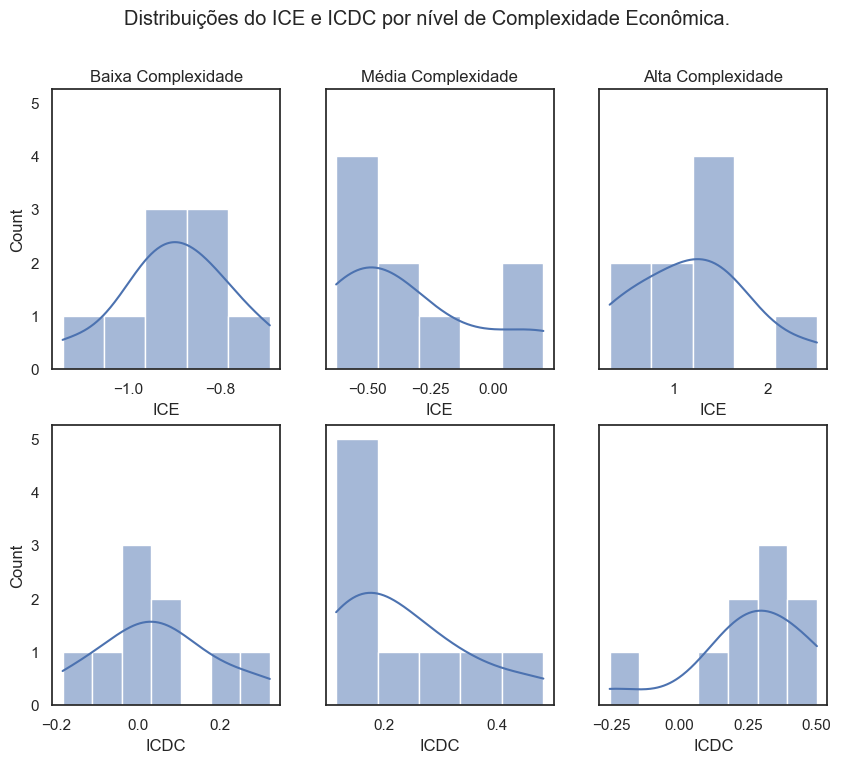

In [10]:
# Visualização da distribuição dos indicadores ICE e ICDC por nível de complexidade econômica.
fig, axs = plt.subplots(2, 3, sharey=True, figsize=(10, 8))
fig.suptitle('Distribuições do ICE e ICDC por nível de Complexidade Econômica.')
sns.histplot(df_r.ICE[df_r.Complexidade == titulo[0]], kde=True, ax=axs[0,0]).set_title('Baixa Complexidade')
sns.histplot(df_r.ICE[df_r.Complexidade == titulo[1]], kde=True, ax=axs[0,1]).set_title('Média Complexidade')
sns.histplot(df_r.ICE[df_r.Complexidade == titulo[2]], kde=True, ax=axs[0,2]).set_title('Alta Complexidade')
sns.histplot(df_r.ICDC[df_r.Complexidade == titulo[0]], kde=True, ax=axs[1,0])
sns.histplot(df_r.ICDC[df_r.Complexidade == titulo[1]], kde=True, ax=axs[1,1])
sns.histplot(df_r.ICDC[df_r.Complexidade == titulo[2]], kde=True, ax=axs[1,2])

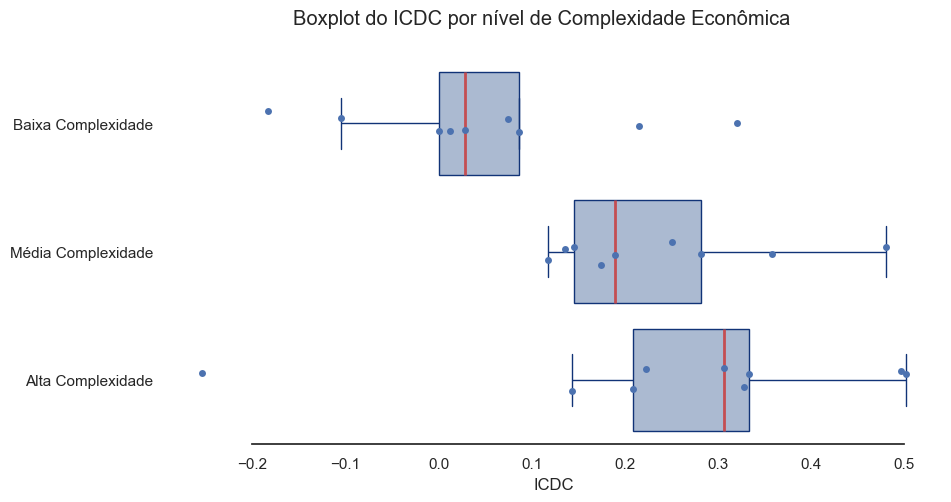

In [11]:
# Plotando gráfico Boxplot com a distribuição do ICDC de cada grupo.
f, ax = plt.subplots(figsize=(10, 5))
f.suptitle('Boxplot do ICDC por nível de Complexidade Econômica')
sns.boxplot(df_r, x="ICDC", y="Complexidade", color="#A5B8D7", linecolor="#137", medianprops={"color": "r", "linewidth": 2},
            flierprops={"marker": None},)
sns.stripplot(df_r, x="ICDC", y="Complexidade")
ax.set(ylabel="")
sns.despine(trim=True, left=True)

#### Verificando se há diferenças entre os grupos

##### O objetivo é verificar se há diferenças quanto as relações entre crédito e complexida econômica. Desse modo, será analisado o Índice de Convergência entre Diversificação e Crédito - ICDE.

##### Como estamos analisando três grupos que possuem 27 observações no total, não será possível aplicar o teste de Análise de Variância – ANOVA.

##### Utilizaremos o teste não paramétrico de Kruskal-Wallis para verificar se há diferenças nas distribuições do ICDC entre os grupos.

##### As hipóteses são:

##### $H_0$: Os três grupos apresentam valores similares do ICDC.
##### $H_1$: Pelo menos um dos grupos apresenta valores do ICDC diferentes.

##### Rejeitaremos $H_0$ se $H\geq\chi^2(2,1-\alpha)$, ou seja, se a estatística $H$ (calculada no teste) for maior ou igual ao valor crítico da tabela Qui-Quadrado com dois graus de liberdade para um determinado nível de significância.
##### Tomaremos $\alpha = 0.05$.
##### Note que o Teste de Kruskal-Wallis não identifica quais grupos possuem diferenças.
##### Constatada a existência de diferenças, aplicaremos o Teste de Dunn que permite realizar comparações múltiplas quando o Teste de K-W permite rejeitar $H_0$.

In [12]:
h, p = stats.kruskal(df_r.ICDC[df_r.Complexidade == titulo[0]], df_r.ICDC[df_r.Complexidade == titulo[1]], df_r.ICDC[df_r.Complexidade == titulo[2]])
print('Teste de Kruskal-Wallis para distribuição do ICDC entre os níveis de complexidade.')
print('Resultado:')
print('Estatística H:', h.round(4))
print('p-value:', p.round(4))
valor_critico = stats.chi2.ppf(0.95, df=2)
print('Valor Crítico para o nível de significância de 5%:', valor_critico.round(4))
if h < valor_critico:
    print('H0 não é rejeitada.\nOs grupos possuem mesma distribuição.')
else:
    print('H0 é rejeitada. Pelo menos um grupo possui distribuição diferente.')

Teste de Kruskal-Wallis para distribuição do ICDC entre os níveis de complexidade.
Resultado:
Estatística H: 8.0
p-value: 0.0183
Valor Crítico para o nível de significância de 5%: 5.9915
H0 é rejeitada. Pelo menos um grupo possui distribuição diferente.


##### Como $H_0$ foi rejeitada. Aplicaremos o Teste de Dunn.

In [13]:
# Aplicando o Teste de Dunn e salvando o resultado em t_dunn.
t_dunn = sp.posthoc_dunn([df_r.ICDC[df_r.Complexidade == titulo[0]], df_r.ICDC[df_r.Complexidade == titulo[1]], df_r.ICDC[df_r.Complexidade == titulo[2]]])
# Renomeando o index e as colunas para uma melhor visualização do resultado.
t_dunn.rename(columns={1: 'Baixa', 2: 'Média', 3: 'Alta'}, index={1: 'Baixa', 2: 'Média', 3: 'Alta'})

,Baixa,Média,Alta
Baixa,1.000000,0.032509,0.007526
Média,0.032509,1.000000,0.592980
Alta,0.007526,0.592980,1.000000


##### O Tese de Dunn retorna em cada célula o $p-value$ da comparação entre dois grupos.
##### Para um nível de significância de $0.05$, temos que o ICDC do grupo de estados com Baixa Complexidade Econômica difere dos grupos de Média e Alta.
##### Mas não é verificada diferença entre os grupos de Média e Alta Complexidade Econômica.
##### De fato, podemos verificar que no grupo com os menores níveis de complexidade temos apenas dois estados com o ICDC > 0.1, enquanto no grupo de Média Complexidade todos os estados possuem ICDC > 0.1 e no grupo com maiores níveis de complexidade apenas o estado do Rio de Janeiro apresenta um ICDC < 0.1. Na verdade, o RJ é um outlier e possui o menor ICDC dentre os estados, entretanto sua presença não altera o resultado do Teste de Dunn.
##### Os resultados encontrados são condizentes com a suposição de que uma atividade que influencia o índice de complexidade econômica deve possuir uma relação na mesma direção com o crédito. Além disso, eles apontam que essa relação é mais forte quanto mais complexa é a economia.